
# Evaluation Metrics for Regression

We have, so far, used some common metrics to evaluate our regression models, but without a clear understanding of what they mean or how to interpret them. In this section, we will correct that omission and learn how to compute and interpret the most common evaluation metrics for regression models.

**Evaluation Metrics** are essential for understanding how well a regression model performs. They help us quantify the difference between predicted and actual values, guiding model selection and improvement.

## Common Regression Evaluation Metrics

The most common regression evaluation metrics include:

-   **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual values.$$MAE = \frac{1}{n} \sum |y_i - \hat{y}_i|$$
    -   Easy to interpret (same units as target variable)
    -   Robust to outliers

-   **Mean Squared Error (MSE)**: Measures the average of the squares of the errors, penalizing larger errors more heavily.$$MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2$$
    -   Penalizes large errors more heavily

-   **Root Mean Squared Error (RMSE)**: The square root of MSE, providing an error metric in the same units as the target variable.$$RMSE = \sqrt{MSE}$$
    -   Same units as the target, easier to interpret than MSE

-   **$R^2$ Score (Coefficient of Determination)**: Represents the proportion of variance explained by the model.$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$
    -   Proportion of variance explained by the model
    -   Can be misleading if used alone

-   **Metric choice depends on research goals**:
    -   MAE: if every error counts equally
    -   RMSE: if large errors are worse
    -   $R^2$: for model comparison, not error interpretation

## Practical Demonstration

For the practical demonstration, we will use the California Housing dataset, for which we want to predict the median house value based on various features. We will fit a linear regression model to this dataset and compute the evaluation metrics discussed above.

-   Load the California Housing dataset

In [1]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

# Create a DataFrame
df = data.frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


-   Exploratory Data Analysis (EDA)

In [2]:
# Print some basic statistics of the dataset
import pandas as pd
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


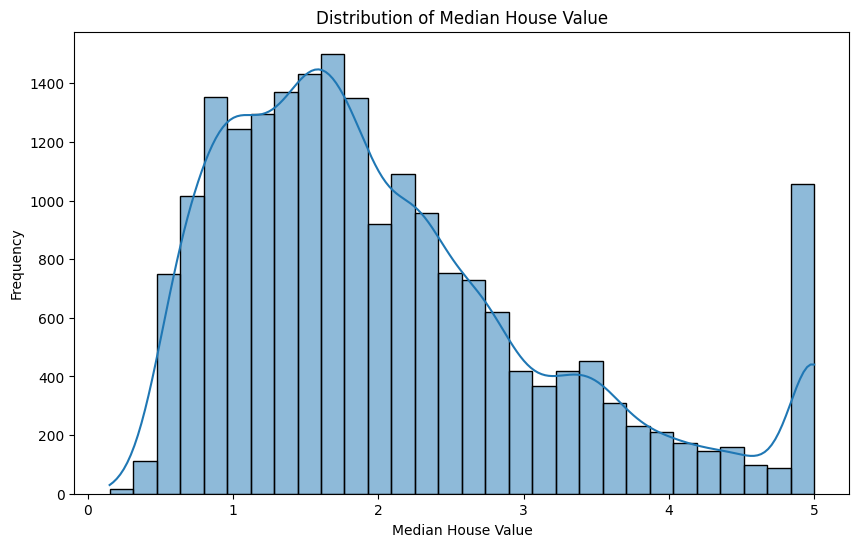

In [3]:
# Visualize the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

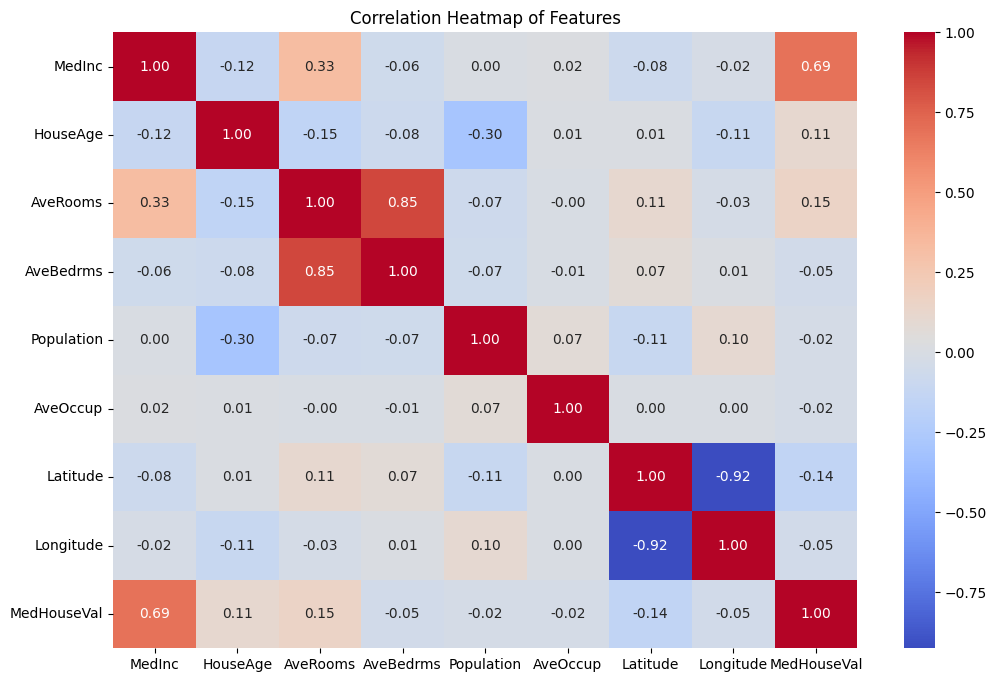

In [4]:
# Visualize the relationship between features and target variable
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

-   Split the dataset into features and target variable, retaining only the most informative feature.

In [5]:
X = df[['MedInc']]
y = df['MedHouseVal']

-   Split the dataset into training and test sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Training set size: 16512, Test set size: 4128


-   Standardize the feature

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

-   Fit a linear regression model to the training data

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


-   Run the model on the test set and compute the predictions

In [9]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred[:5])  # Display first 5 predictions
print("Actual values:", y_test.values[:5])  # Display first 5 actual values

Predictions: [1.14958917 1.50606882 1.90393718 2.85059383 2.00663318]
Actual values: [0.477   0.458   5.00001 2.186   2.78   ]


-   Visualize the regression line

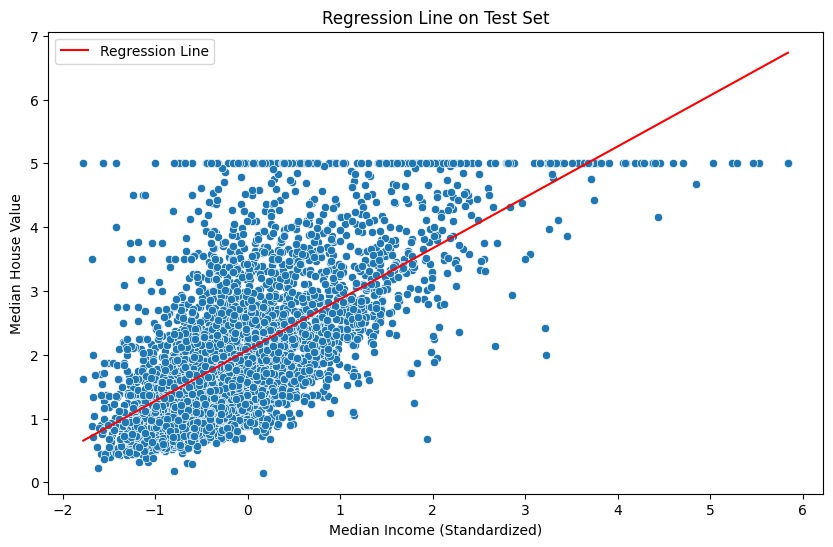

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:,0], y=y_test)
sns.lineplot(x=X_test[:,0], y=y_pred, color='red', label='Regression Line')
plt.title('Regression Line on Test Set')
plt.xlabel('Median Income (Standardized)')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

-   Compute the evaluation metrics

In [11]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 0.63
MSE: 0.71
RMSE: 0.84
R²: 0.46


-   Let's add some outliers to the target variable to see how the metrics behave

In [12]:
import numpy as np

# Introduce outliers in the test set
y_test_with_outliers = y_test.copy()
y_test_with_outliers.iloc[0] += 100  # Add an outlier to the first element
y_test_with_outliers.iloc[-1] -= 100  # Add an outlier to the last element

# Recompute predictions with outliers
y_pred_with_outliers = model.predict(X_test)

# Compute metrics with outliers
mae_outliers = mean_absolute_error(y_test_with_outliers, y_pred_with_outliers)
mse_outliers = mean_squared_error(y_test_with_outliers, y_pred_with_outliers)
rmse_outliers = np.sqrt(mse_outliers)
r2_outliers = r2_score(y_test_with_outliers, y_pred_with_outliers)

print(f"MAE with Outliers: {mae_outliers:.2f}")
print(f"MSE with Outliers: {mse_outliers:.2f}")
print(f"RMSE with Outliers: {rmse_outliers:.2f}")
print(f"R² with Outliers: {r2_outliers:.2f}")

MAE with Outliers: 0.68
MSE with Outliers: 5.54
RMSE with Outliers: 2.35
R² with Outliers: 0.09


## Hands-on Exercises

-   Fit a linear regression model to the Ames dataset (feature = `GrLivArea`, target = `SalePrice`).

In [13]:
# Load the Ames dataset
from sklearn.datasets import fetch_openml
data = fetch_openml(name='house_prices', as_frame=True)
df = data.frame

# Select features and target variable
X = df[['GrLivArea']]
y = df['SalePrice']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


-   Compute and report the evaluation metrics for the model.

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 38341.20
MSE: 3418946311.18
RMSE: 58471.76
R²: 0.55


-   Change the target variable by multiplying it by 1000. Recompute the metrics.

In [15]:
# Change the target variable by multiplying it by 1000
y_test_scaled = y_test * 1000
y_pred_scaled = y_pred * 1000
# Recompute the metrics
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
print(f"MAE with scaled target: {mae_scaled:.2f}")
print(f"MSE with scaled target: {mse_scaled:.2f}")
print(f"RMSE with scaled target: {rmse_scaled:.2f}")
print(f"R² with scaled target: {r2_scaled:.2f}")

MAE with scaled target: 38341204.48
MSE with scaled target: 3418946311180806.00
RMSE with scaled target: 58471756.53
R² with scaled target: 0.55
